# Unsupervised Learning

- Material on Github [DSS-ML/Unsupervised](https://github.com/DSS-ML/Unsupervised)

In [1]:
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from termcolor import colored #freak library !pip install termcolor
from scipy import stats
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.cluster import KMeans
# !pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA 
import os
from sklearn.cluster import DBSCAN
from itertools import product
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/DSS-ML/Unsupervised/main/wine.data", names=['Class', 
                                      'Alcohol', 
                                      'Malic acid',
                                      'Ash',
                                      'Alcalinity of ash' ,
                                      'Magnesium', 
                                      'Total phenols',
                                      'Flavanoids' ,
                                      'Nonflavanoidphenols', 
                                      'Proanthocyanins',
                                      'Color intensity',
                                      'Hue',
                                      'OD280/OD315 DW',
                                      'Proline'])
print(data.shape)
data.head(5)

(178, 14)


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 DW,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Columns type
print(colored('Before \n', attrs=['bold']))
print(data.info(),'\n')
#let's change 'Class' from int to cateogry
data['Class'] = data['Class'].astype('category')

Before 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Class                178 non-null    int64  
 1   Alcohol              178 non-null    float64
 2   Malic acid           178 non-null    float64
 3   Ash                  178 non-null    float64
 4   Alcalinity of ash    178 non-null    float64
 5   Magnesium            178 non-null    int64  
 6   Total phenols        178 non-null    float64
 7   Flavanoids           178 non-null    float64
 8   Nonflavanoidphenols  178 non-null    float64
 9   Proanthocyanins      178 non-null    float64
 10  Color intensity      178 non-null    float64
 11  Hue                  178 non-null    float64
 12  OD280/OD315 DW       178 non-null    float64
 13  Proline              178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None 



In [4]:
#See the difference ? 
print(colored('After \n', attrs=['bold']))
print(data.info(),'\n')
print('Number of rows and column ->',colored(data.shape, 'red'))

After 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Class                178 non-null    category
 1   Alcohol              178 non-null    float64 
 2   Malic acid           178 non-null    float64 
 3   Ash                  178 non-null    float64 
 4   Alcalinity of ash    178 non-null    float64 
 5   Magnesium            178 non-null    int64   
 6   Total phenols        178 non-null    float64 
 7   Flavanoids           178 non-null    float64 
 8   Nonflavanoidphenols  178 non-null    float64 
 9   Proanthocyanins      178 non-null    float64 
 10  Color intensity      178 non-null    float64 
 11  Hue                  178 non-null    float64 
 12  OD280/OD315 DW       178 non-null    float64 
 13  Proline              178 non-null    int64   
dtypes: category(1), float64(11), int64(2)
memory usage: 18.5 KB
None 


In [5]:
# check if the are some missing value
print(data.isnull().sum(),colored('\n\n No missing Data lucky day!','green'))

Class                  0
Alcohol                0
Malic acid             0
Ash                    0
Alcalinity of ash      0
Magnesium              0
Total phenols          0
Flavanoids             0
Nonflavanoidphenols    0
Proanthocyanins        0
Color intensity        0
Hue                    0
OD280/OD315 DW         0
Proline                0
dtype: int64 

 No missing Data lucky day!


In [6]:
# data distribution numeric
data._get_numeric_data().describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoidphenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [7]:
#data distribution class category
data.Class.value_counts().sort_index()

1    59
2    71
3    48
Name: Class, dtype: int64

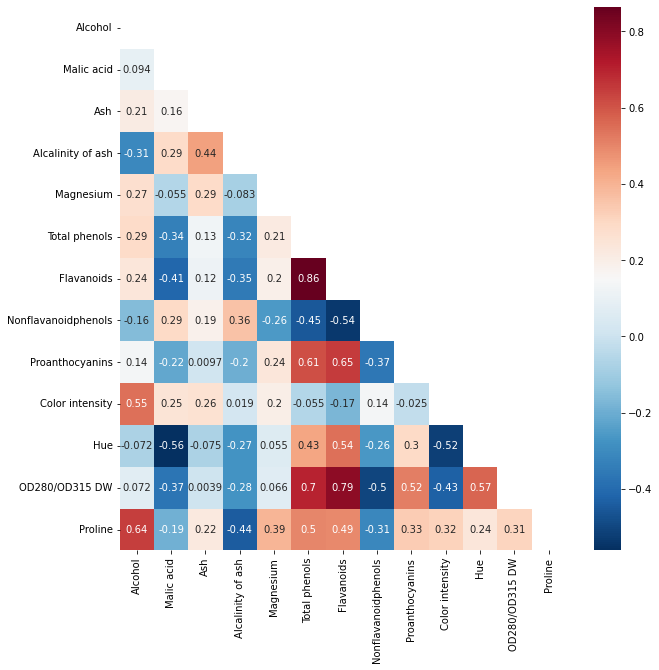

In [8]:
# correlation matrix
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(data.corr(), annot=True, mask = mask, cmap ="RdBu_r");

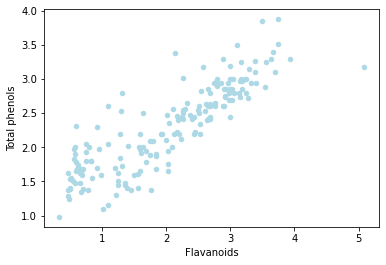

It would seem that there are some outliers in the dataset, are they the only ones? If so, how could it be solved?


In [9]:
# let's plot the most correlated variable
data.plot(kind= 'scatter', x= 'Flavanoids', y='Total phenols', c= 'lightblue')
plt.show()
print('It would seem that there are some outliers in the dataset, are they the only ones? If so, how could it be solved?')

Maybe using z score! A nice way is to assume that the distribution of data X has a mean $\mu$ and sd $\sigma$. The z-score measures how many values are distant from $\mu$

In [10]:
data_no_out = data.iloc[:,1:] #exclude category variable
data_no_out = data_no_out[(np.abs(stats.zscore(data_no_out)) < 3).all(axis=1)]
data_no_out['Class'] = data.loc[data_no_out.index]['Class'] #come back togheter with original index, u know what i mean
data_no_out.reset_index(inplace = True, drop = True)
print('Original data shape', data.shape,'No outlier data shape',data_no_out.shape) 

Original data shape (178, 14) No outlier data shape (168, 14)


We choose to use 3 because we assume that we want to take data at most 3$\sigma$ times distant from the mean.

In [11]:
X = data_no_out.iloc[:,:-1] #bye bye class
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In the previous episode... Dimensionality Reduction!                   


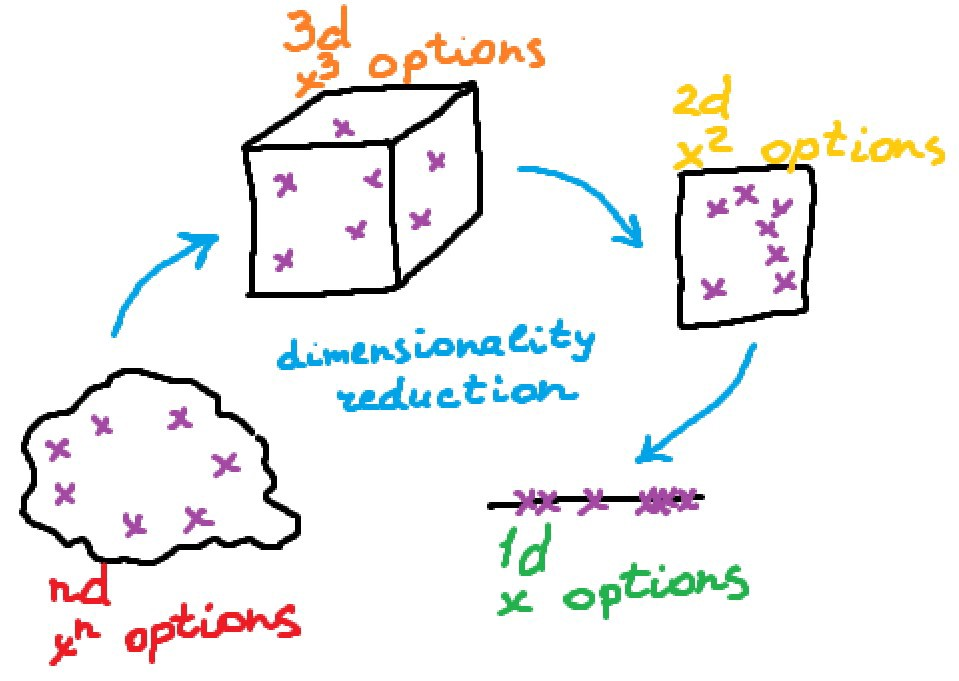

*capture the salient information in the original data while reducing the size of the dataset*

**Time for our BFF PCA!**

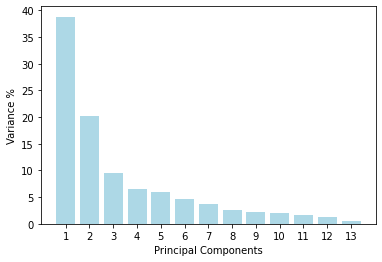

In [12]:
pca = PCA()
principalComponents = pca.fit_transform(X)
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_*100, color='lightblue')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)
# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)


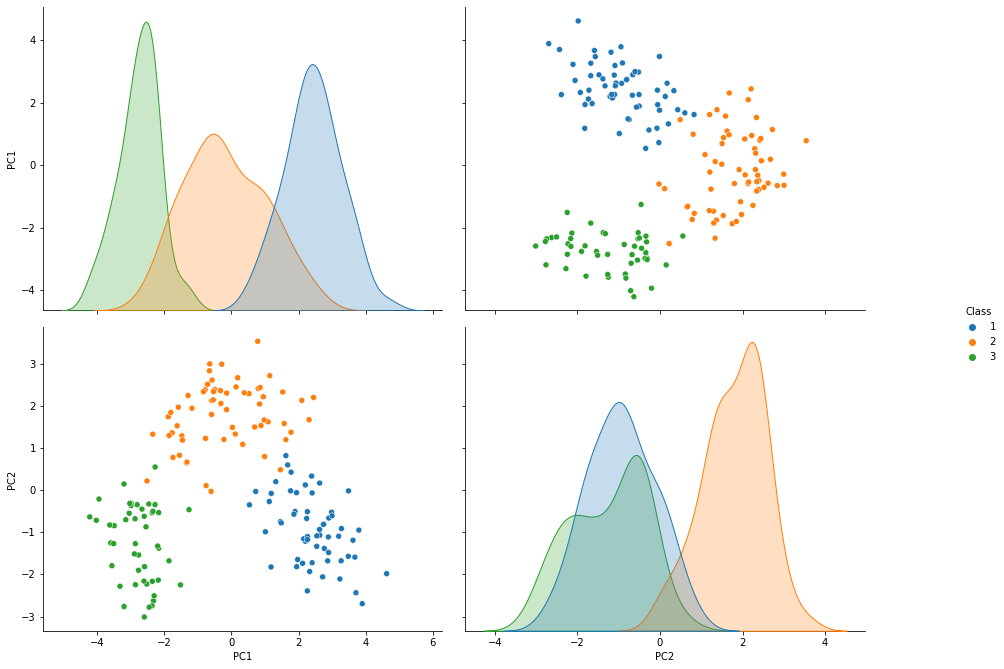

Awesome! PCA has helped us to reduce the dimension of our data and we were able to make this nice plot. As we can see, extracting principal components, instead of randomly picking variables, allows us to perfectly recognize the group pattern defined by the pre-existing "Class" attribute.


In [13]:
just_for_visualization = pd.concat([PCA_components.loc[:,:1].rename(columns={0:'PC1',1:'PC2'}), data_no_out[['Class']]], axis = 1)
pca = sns.pairplot(vars = ['PC1', 'PC2'] , data = just_for_visualization, hue = 'Class')
pca.fig.set_size_inches(15,10)
plt.show()
print('Awesome! PCA has helped us to reduce the dimension of our data and we were able to make this nice plot. As we can see, extracting principal components, instead of randomly picking variables, allows us to perfectly recognize the group pattern defined by the pre-existing "Class" attribute.')


## and so... Today **Clustering**!

**Goal**
- Discovery Groups 

**What?** 
- Group objects together based on similarity

**How?**: 
- Without using any labels, comparing how similar the data for one observation is to data for other observations and groups

**Why?**: 
- Recommender  systems; Targetted marketing; Customer Segmentation 



**p.s.** yeah you can use clustering after you have reduce dimensionality (*more manageable set*) and find interesting patterns :)

## Most Famous

- K-means
- DBScan
- Hierarchical Clustering



# K-Means

**The K-means problem**:
- Consider a set $X = {x_1,...,x_n}$ of n points in $R^d$
- Assume that the number k is given
- Problem:
    - Find k points $(c_1,...,c_k)$ (named centers or means) so that the cost is minimized:
    $C_1,...,C_k$ = argmin $\sum_{i=1}^k \sum_{x\in S_i} || x-C_i||^2$
    
    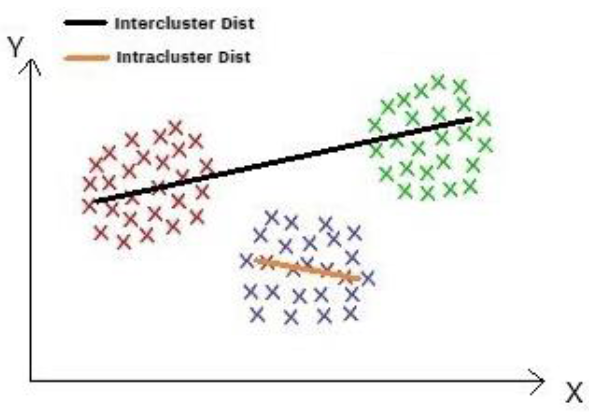

**Algorithm**
- 1. Cluster the data into k groups where k is predefined
- 2. Select k points at random as cluster centers
- 3. Assign objects to their closest cluster center according to the Euclidean distance function
- 4. Calculate the centroid or mean of all objects in each cluster 
- 5. Repeat steps 2,3 and 4 until the same points are assigned to each cluster in consecutive rounds

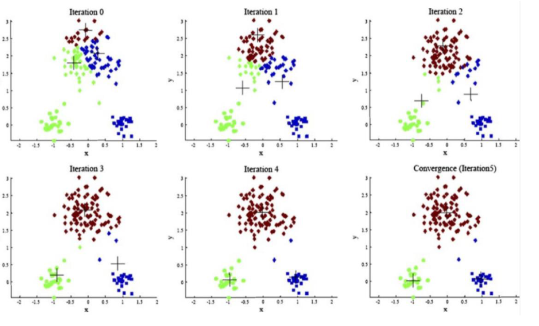

- K-means is a NP-hard problem if the dimension of the data is at least 2 ($d >=2$)

- K=1 and K=n are easy special case... why?

**Limitation**
- Different size
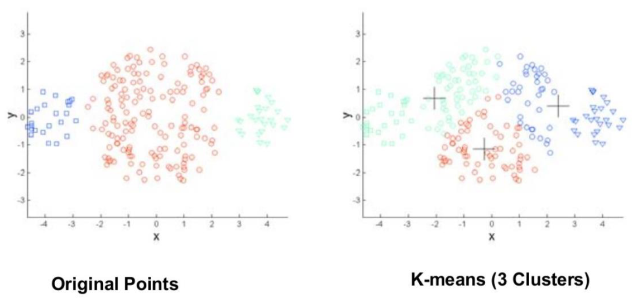

- Different density
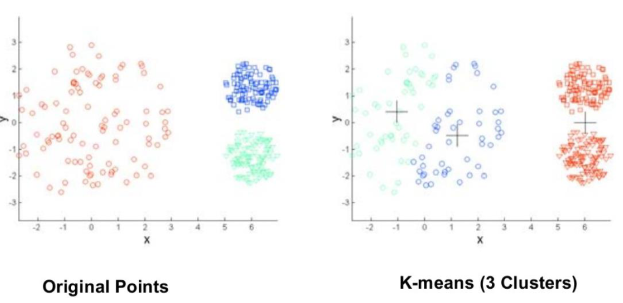

- no-spherical shapes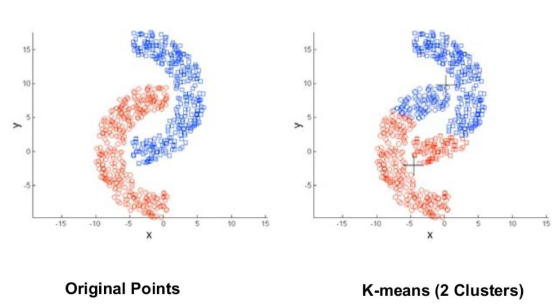

- effects of bad initialization

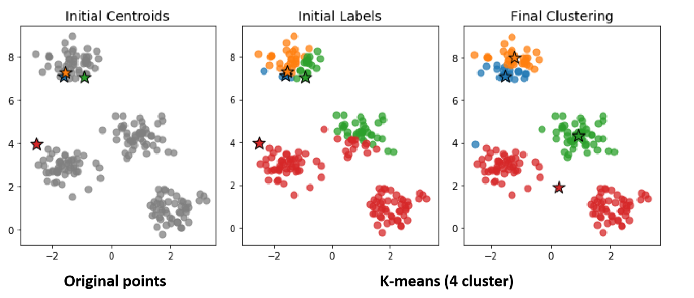

# K-means ++
- Identical to K-means except for initialization
- WHY?
    - Pick the first centroid point ($C_1$) randomly
    - Compute distance of all points in the data from the selected centroid $d_i = max_{j:1 \rightarrow m} ||x_i - C_j||^2$
    - Repeat till you find k-centroids

**Best K value**
- To determine the right K, draw a plot between loss vs K using [Elbow method](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/)
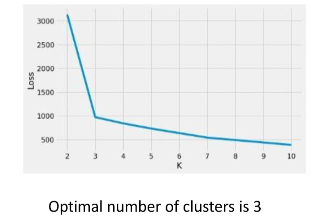

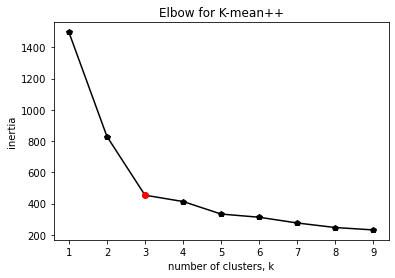

Typically, we look at these inertia plots above to find the elbow point. Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters (K). In our case, it looks like the elbow occurs with 3 clusters, so we will proceed with that.


In [14]:
inertias = [] # our WSS
ks = range(1, 10)
# Creating 10 K-Mean++ models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters = k, init = 'k-means++', n_init = 1, random_state = 0)
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
plt.plot(range(1,10), inertias, '-p', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.plot(3,inertias[2],'ro')
plt.xticks(ks)
plt.title('Elbow for K-mean++')
plt.show()
print('Typically, we look at these inertia plots above to find the elbow point. Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters (K). In our case, it looks like the elbow occurs with 3 clusters, so we will proceed with that.')

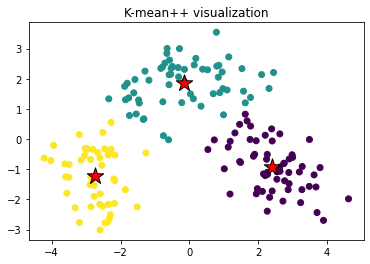

[[ 2.40965897 -0.91245968]
 [-0.16544478  1.84609691]
 [-2.75161974 -1.22451646]]


In [15]:
model = KMeans(n_clusters=3, init = 'k-means++', n_init = 1)
model.fit(PCA_components.iloc[:,:2])
# coordinates of cluster center
centroids = model.cluster_centers_ 
# cluster label for each data point
labels = model.labels_ 
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.scatter( centroids[:, 0], centroids[:, 1], s=300, marker='*', c='red', edgecolor='black')
plt.title('K-mean++ visualization')
plt.show()
print(centroids[:,0:2])

In [16]:
data_no_out['clusters'] = labels
data_no_out.groupby(["clusters"]).agg({
    'Alcohol': 'median', 
    'Color intensity': 'median', 
    'Malic acid': 'median', 
    'Magnesium': 'median',
    'Ash' : 'median',
    'Total phenols' : 'median',
    'Proline' : 'median'})

,Alcohol,Color intensity,Malic acid,Magnesium,Ash,Total phenols,Proline
clusters,,,,,,,
0,13.750,5.40,1.760,104.0,2.43,2.800,1095.0
1,12.290,2.94,1.610,88.0,2.27,2.200,480.0
2,13.135,7.40,3.285,96.5,2.38,1.635,622.5


# K-medoids

**Idea** 
- make the final centroids as actual data-points

**How**
- Initialization: Same as K-means ++
- Assignment: Same as K-means
- Update centroid: if there are m-point in a cluster, swap the previous centroid with all other (m-1) points from the cluster and finalize the point as a new centroid that has a minimum loss

    $M_1,...M_k = argmin \sum_{i=1}^k \sum_{x\ in S_i} ||x-M_i||^2$
- Repeat

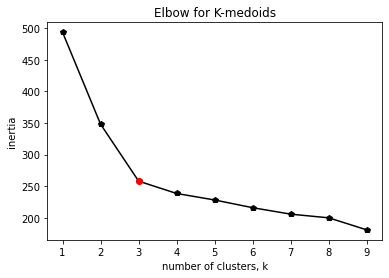

In [17]:
# Compute Kmedoids clustering
inertias = [] # our WSS
ks = range(1, 10)
# Creating 10 K-Medoids models while varying the number of clusters (k)
for k in range(1,10):
    model = KMedoids(n_clusters=k)
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
plt.plot(range(1,10), inertias, '-p', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.plot(3,inertias[2],'ro')
plt.xticks(ks)
plt.title('Elbow for K-medoids')
plt.show()

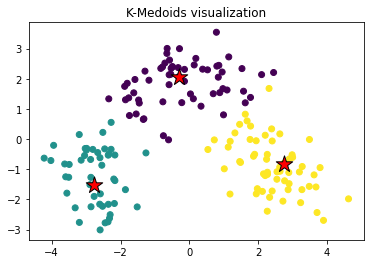

[[-0.31196241  2.06356365]
 [-2.76412272 -1.53800509]
 [ 2.74031831 -0.81111308]]


In [18]:
model =  KMedoids(n_clusters=3)
model.fit(PCA_components.iloc[:,:3])
# coordinates of cluster center
centroids = model.cluster_centers_ 
# cluster label for each data point
labels = model.labels_ 
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.scatter( centroids[:, 0], centroids[:, 1], s=300, marker='*', c='red', edgecolor='black')
plt.title('K-Medoids visualization')
plt.show()
print(centroids[:,0:2])

In [19]:
data_no_out['clusters'] = labels
data_no_out.groupby(["clusters"]).agg({
    'Alcohol': 'median', 
    'Color intensity': 'median', 
    'Malic acid': 'median', 
    'Magnesium': 'median',
    'Ash' : 'median',
    'Total phenols' : 'median',
    'Proline' : 'median'})

,Alcohol,Color intensity,Malic acid,Magnesium,Ash,Total phenols,Proline
clusters,,,,,,,
0,12.270,2.92,1.620,88.0,2.275,2.200,476.0
1,13.135,7.40,3.285,96.5,2.380,1.635,622.5
2,13.745,5.40,1.755,103.5,2.425,2.825,1087.5


# DBScan

**Name**
- Density-Based Spatial cluster of application with noise

**Aim**
- Separate clusters of high dentisy from clusters of low density
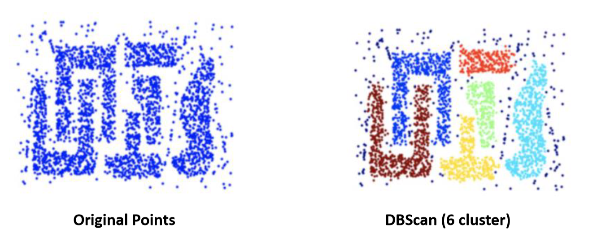

**How**
- Divides the dataset in n-dimension
- For each point in the dataset, the algorithm forms an n dimensional shape around the data point, and then counts how many data points fall within that shape
- The shape will count as a cluster
- DBScan iteratively expands the cluster by going through each individual point within the cluster, and counting the number of other data points nearby

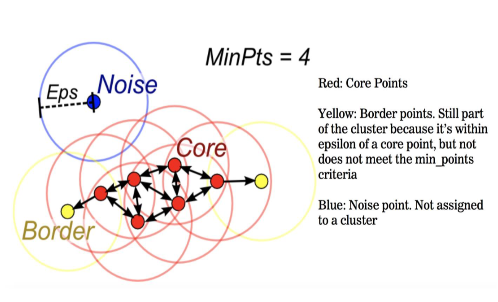

**Advantages**
- It is great at separating clusters of high density vs cluster of low dentsity
- Handling outliers ~as a motherf****~  in a great way!

**Disadvantages**
- Issues with clusters of similar density and with high dimensionality data

In [20]:
mall_data = pd.read_csv('https://raw.githubusercontent.com/DSS-ML/Unsupervised/main/Mall_Customers.csv')
print(mall_data['Gender'].value_counts())
mall_data.describe().T


Female    112
Male       88
Name: Gender, dtype: int64


,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [21]:
X = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
#To choose the best combination of the algorithm parameters we will first create a matrix of investigated combinations
# eps values to be investigated
eps_values = np.arange(8,12.75,0.25)
# min_samples values to be investigated
min_samples = np.arange(3,10) 
#define DBScan parameter
DBScan_params = list(product(eps_values, min_samples))
# Collecting number of generated clusters
no_of_clusters = []
sil_score = []
for p in DBScan_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))

With the heatmap we can evaluate which are the best parameters to choose to build our clustering. But first a little explanation: Silhouette score is a metric used to calculate the goodness of a clustering technique. It has a range between (-1,1)

- 1: Means clusters are well apart from each other and clearly distinguished
- 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
- -1: Means clusters are assigned in the wrong way

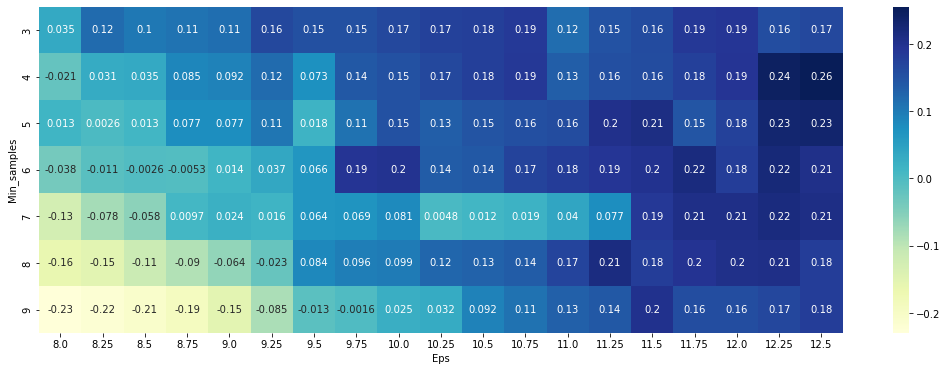

After going blind, we will see that the maximum is found for a silhuoette score of 0.26, eps = 12.5 and min_samples = 4


In [22]:
tmp = pd.DataFrame.from_records(DBScan_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()
print('After going blind, we will see that the maximum is found for a silhuoette score of 0.26, eps = 12.5 and min_samples = 4')

In [23]:
#let's apply for the parameter found
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X)
DBSCAN_clustered = X.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes
print('DBSCAN created 5 clusters plus outliers cluster (-1). Sizes of clusters 0-4 vary significantly - some have only 4 or 8 observations. There are 18 outliers.')

DBSCAN created 5 clusters plus outliers cluster (-1). Sizes of clusters 0-4 vary significantly - some have only 4 or 8 observations. There are 18 outliers.


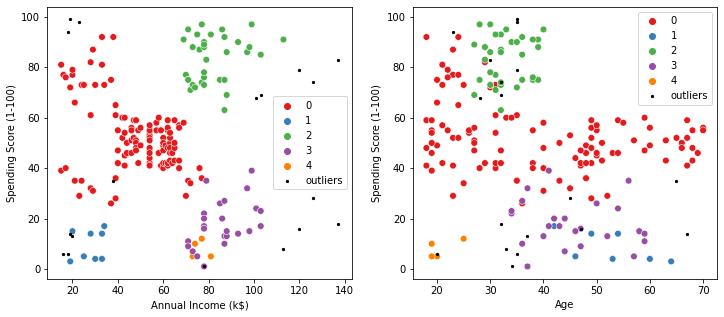

The graphs above shows that there are some outliers. These points do not meet distance and minimum samples requirements to be recognised as a cluster.


In [24]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]
fig2, (axes) = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)
sns.scatterplot('Age', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()
plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')
plt.show()
print('The graphs above shows that there are some outliers. These points do not meet distance and minimum samples requirements to be recognised as a cluster.')

# Hierarchical Clustering

- Like K-means, groups togheter the data points with similar characteristics

- Two types of algorithm:
    - Agglomerative: bottom-up approach
    - Divisive: top-down approach

## Agglomerative
**How**
- At the start, treat each data point as one cluster. 
  So we will have a number of cluster equal to K
- Form a cluster by joining the two closest data points resulting in K-1 clusters.
- Form more clusters by joining the two closest clusters resulting in K-2 clusters.
- Repeat the above three steps until one big cluster is formed
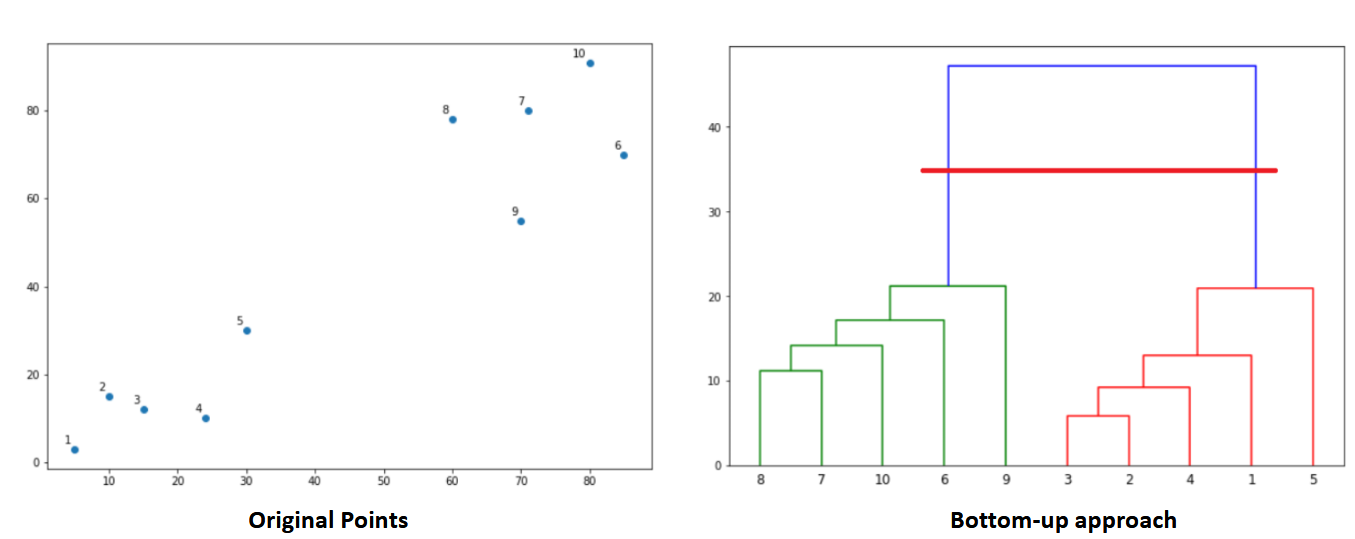

**When you applied agglomerative algorithm you should chose which linkage criterion to use** 


The linkage criterion determines which distance to use between sets of observation. 

The algorithm will merge the pairs of cluster that minimize this criterion.


- ‘ward’ minimizes the variance of the clusters being merged.

- ‘average’ uses the average of the distances of each observation of the two sets.

- ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

- ‘single’ uses the minimum of the distances between all observations of the two sets.


In [25]:
X = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
#standardize 
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
parameters=['ward', 'complete', 'average', 'single']
n_clusters=np.arange(1,10)
agh_cluster_results_ = pd.DataFrame(columns=['Linkage Type','Number of Cluster','Silhouette Score'])
for i in parameters:
    for j in n_clusters:
        agh_cluster = AgglomerativeClustering(n_clusters=j,linkage=i)
        clusters=agh_cluster.fit_predict(X)
        if len(np.unique(clusters))>=2:
            agh_cluster_results_ = agh_cluster_results_.append({"Linkage Type":i,'Number of Cluster':j,
                                    "Silhouette Score":silhouette_score(X,clusters)}                                   
                                   ,ignore_index=True)

In [26]:
agh_cluster_results_.sort_values('Silhouette Score',ascending=False)[:10]

,Linkage Type,Number of Cluster,Silhouette Score
4,ward,6,0.420117
19,average,5,0.409569
23,average,9,0.406859
11,complete,5,0.399982
5,ward,7,0.398295
10,complete,4,0.390139
3,ward,5,0.390028
20,average,6,0.389573
18,average,4,0.383906
21,average,7,0.380044


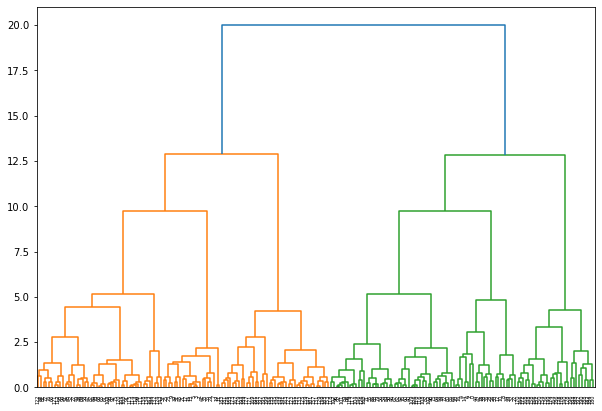

In [27]:
# Using Ward's method
linked = linkage(X, 'ward') # minimizes the variance of the clusters being merged
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

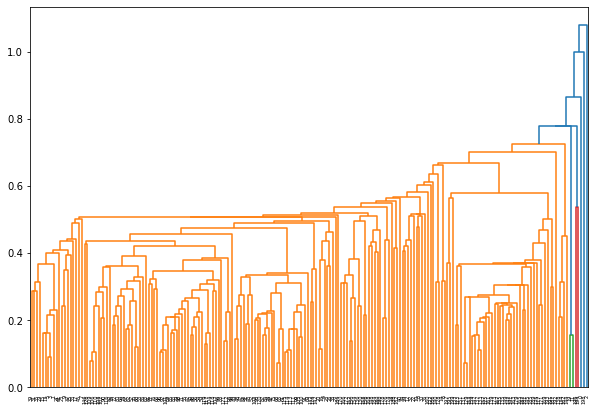

In [28]:
# Using Single link method
linked = linkage(X, 'single') #uses the minimum of the distances between all observations of the two sets

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

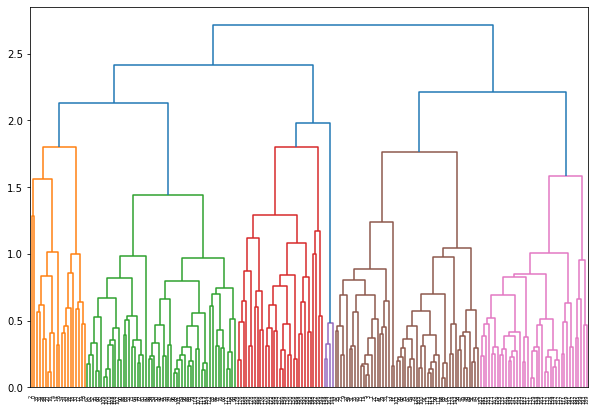

In [29]:
# Using Average method
linked = linkage(X, 'average') #uses the average of the distances of each observation of the two sets

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

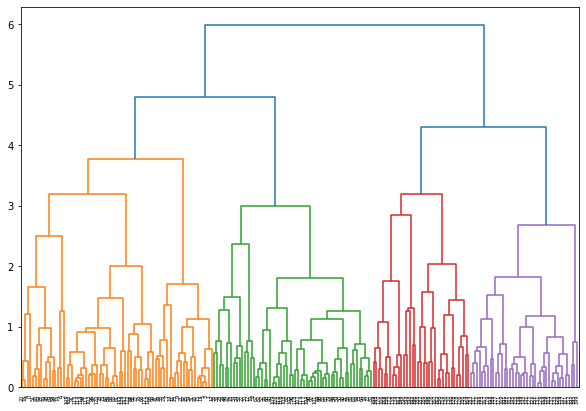

In [30]:
# Using Complete link method
linked = linkage(X, 'complete') #uses the maximum distances between all observations of the two sets

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

## Challenge!

Try applying the techniques we saw today to Pokemon data! What would seem to be the best clustering algorithm to apply? 

# Bonus code about Spark available on [colab](https://colab.research.google.com/drive/1QNtSCfyMz-vkgXHrZ6eouD1RvtrMw_cg?usp=sharing)